In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
import scipy as sp
import numpy as np
import emcee
import testkit
import corner
import pickle as pickle
from IPython.display import display
%matplotlib inline
import forwardmodel
import ciamod
import TPmod
import cloud
import band
from astropy.convolution import convolve, convolve_fft
from astropy.convolution import Gaussian1DKernel
from scipy.io.idl import readsav
from scipy import interpolate
from scipy.interpolate import interp1d
from mikesconv import instrument_non_uniform

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
with open('2M0355_grey_ch4.pk1', 'rb') as input:
    sampler = pickle.load(input) 
print sampler.chain.shape


(336, 30000, 21)


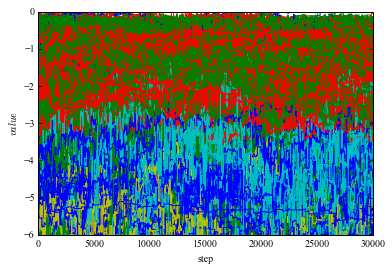

In [3]:
nwalkers = sampler.chain.shape[0]
niter = sampler.chain.shape[1]
ndim = sampler.chain.shape[2]
plt.rc('font',family='Times New Roman')
fig=plt.figure(dpi=320)
plt.axis([0, niter, -6.0,0.])
index = np.arange(niter)
for i in range(0,nwalkers):
    plt.plot(index[:],sampler.chain[i,:,0],'r-')
    plt.plot(index[:],sampler.chain[i,:,1],'b-')
    plt.plot(index[:],sampler.chain[i,:,2],'g-')
    plt.plot(index[:],sampler.chain[i,:,3],'c-')
    plt.plot(index[:],sampler.chain[i,:,4],'y-')
    
plt.ylabel(r'$value$')
plt.xlabel('step')


In [4]:
samples = sampler.chain[:,niter-1000:,:].reshape((-1,ndim))

#samples = tmpsamples[np.where(tmpsamples[:,] > 0.)]
gassamples = samples[:,0:10]

In [5]:
print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))
print gassamples.shape
print gassamples[0:10,0:10]
print("autocorrelation time: {0:.3f}"
                .format(np.mean(sampler.acor)))

Mean acceptance fraction: 0.027
(336000, 10)
[[-1.45785285 -4.2701164  -2.2741296  -6.18959902 -7.57067728 -7.13388118
  -6.24667406 -7.42664093 -2.33899777  4.79427215]
 [-1.45785285 -4.2701164  -2.2741296  -6.18959902 -7.57067728 -7.13388118
  -6.24667406 -7.42664093 -2.33899777  4.79427215]
 [-1.45785285 -4.2701164  -2.2741296  -6.18959902 -7.57067728 -7.13388118
  -6.24667406 -7.42664093 -2.33899777  4.79427215]
 [-1.45785285 -4.2701164  -2.2741296  -6.18959902 -7.57067728 -7.13388118
  -6.24667406 -7.42664093 -2.33899777  4.79427215]
 [-1.45785285 -4.2701164  -2.2741296  -6.18959902 -7.57067728 -7.13388118
  -6.24667406 -7.42664093 -2.33899777  4.79427215]
 [-1.45785285 -4.2701164  -2.2741296  -6.18959902 -7.57067728 -7.13388118
  -6.24667406 -7.42664093 -2.33899777  4.79427215]
 [-1.45785285 -4.2701164  -2.2741296  -6.18959902 -7.57067728 -7.13388118
  -6.24667406 -7.42664093 -2.33899777  4.79427215]
 [-1.45785285 -4.2701164  -2.2741296  -6.18959902 -7.57067728 -7.13388118
  -6.2

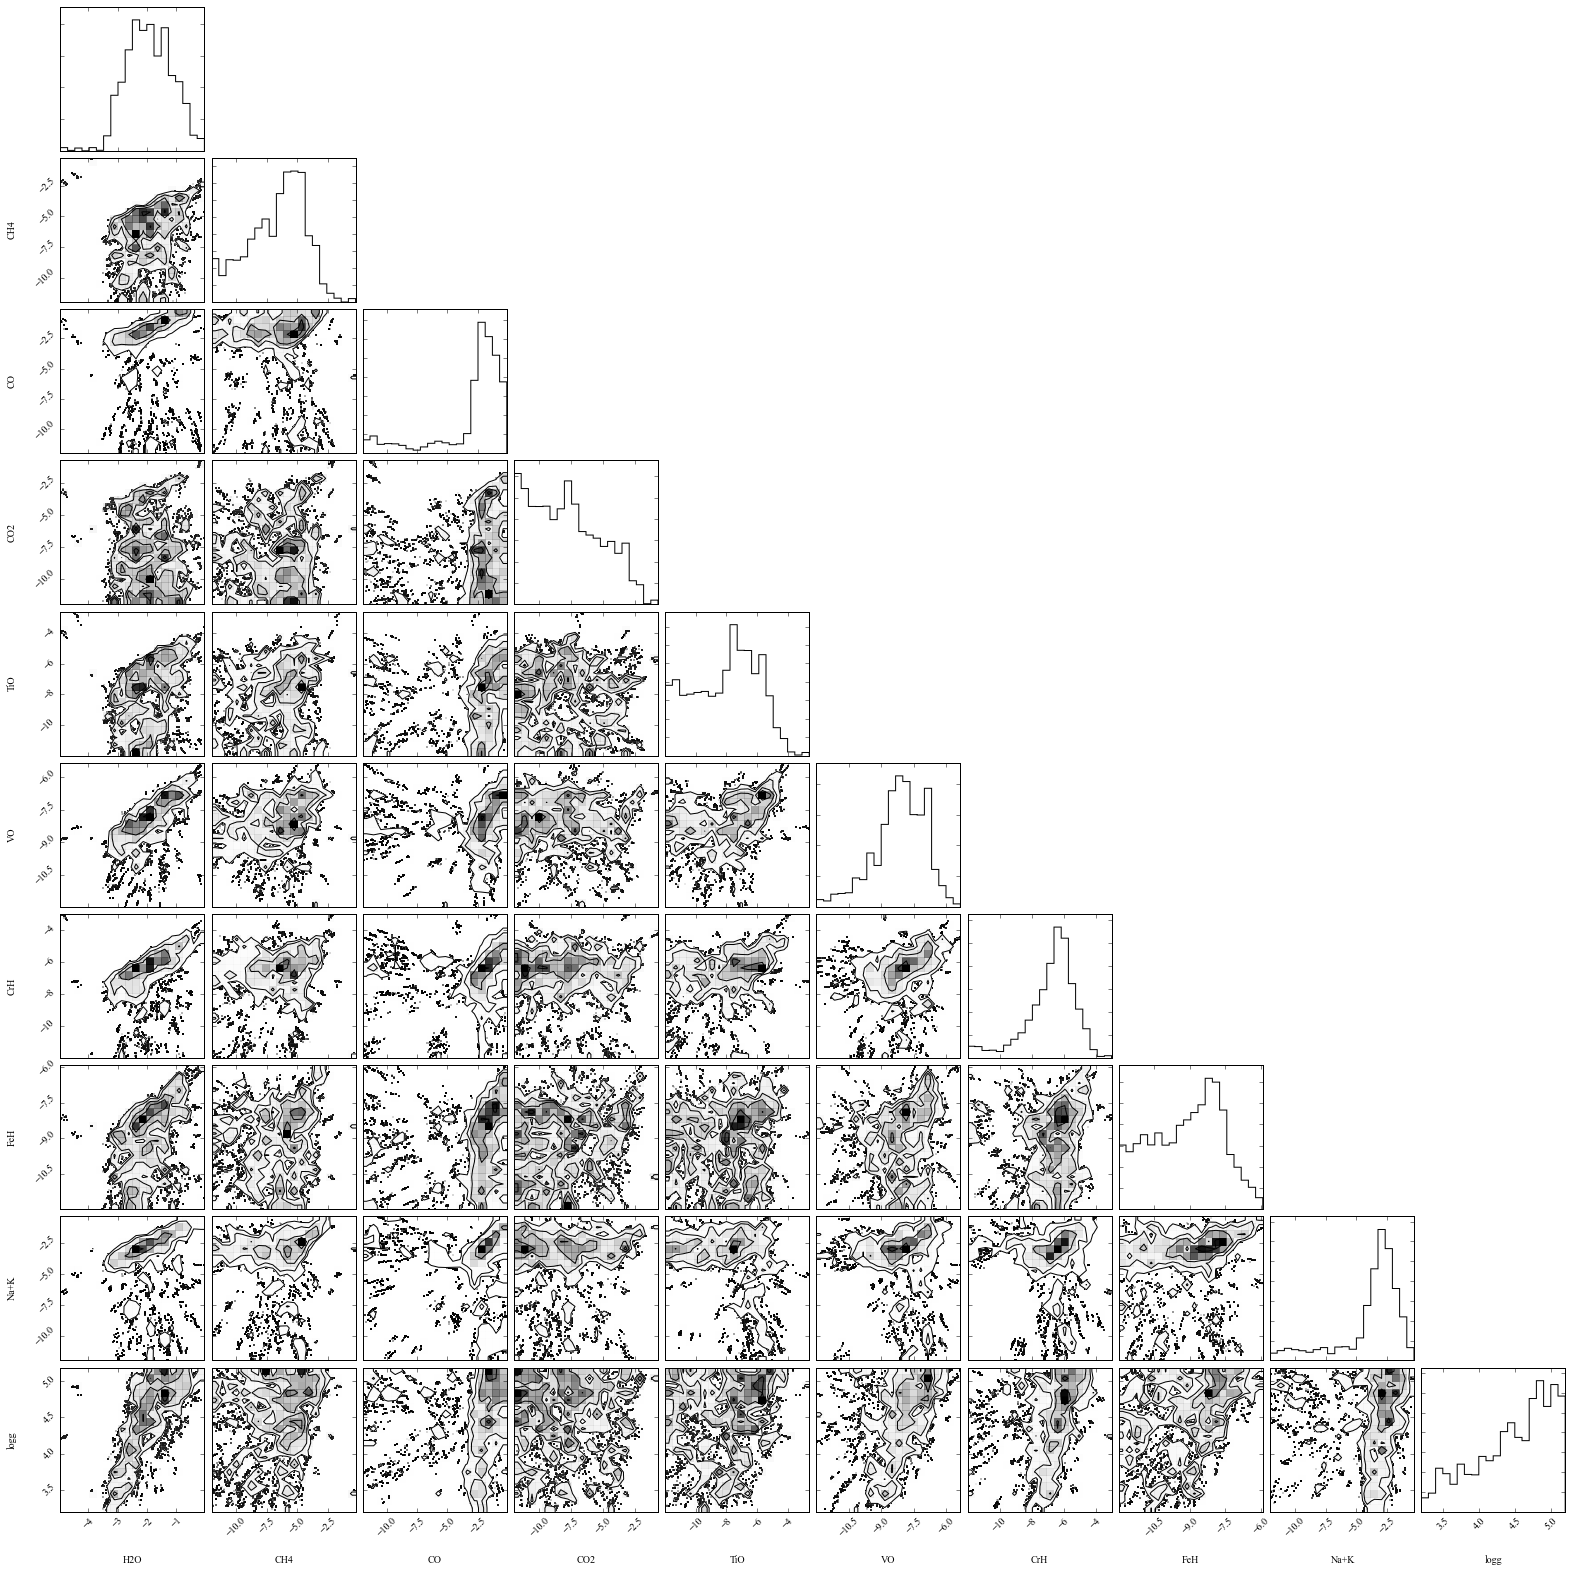

In [6]:
fig = corner.corner(gassamples,labels=["H2O","CH4","CO","CO2","TiO","VO","CrH","FeH","Na+K","logg"])
#fig = triangle.corner(samples)
fig.savefig("2m0355_ch4_gascorner.png")

In [7]:
#samples2 = gassamples[:,:]
#samples2[:, 4] = np.exp(samples[:, 4])
vmrlist = map(lambda v: (v[0], v[1], v[2]),
                             zip(*np.percentile(gassamples, [16, 50, 84],
                                                axis=0)))

In [8]:
print vmrlist
vmr = np.array(vmrlist)
# [-3.5,-3.4,-8.0,-7.5,-8.2]

[(-2.6652520842376735, -1.9421610440116153, -1.1027265596412481), (-9.3070314125020115, -6.2170662102959087, -4.4772967246425779), (-5.4118522299373204, -2.0171744059192998, -0.87663348232694971), (-10.95004907192315, -8.0859015777032948, -4.7007660994046869), (-10.648056850833957, -7.6759388487825415, -5.8214923110011298), (-9.3164607872707208, -8.0394614135586959, -6.9184814391372722), (-8.0946189601292104, -6.4970131056525222, -5.5024560567046397), (-10.949238786353719, -8.9368735468334677, -7.6684082236851472), (-6.0015905932541376, -3.0982754311270546, -1.9075438657632628), (3.8572143258424347, 4.5885235034116478, 5.0221301203997406)]


In [9]:
with open('2M0355_cloud_postproduct.pk1', 'rb') as input:
   postsamp = pickle.load(input) 
#print postsamp.shape
#np.where(np.isnan(sampler[:,5]) == True)
#print postsamp[2000,:]
#postsamp = postsamp[np.logical_not(np.isnan(postsamp[:,24])),:]
print  postsamp.shape
print postsamp[2000,:]
#print test

(1680000, 24)
[ -2.11801416e+00  -4.62076714e+00  -2.60718749e+00  -1.18229185e+01
  -6.80928255e+00  -7.33616029e+00  -6.34677282e+00  -1.05585806e+01
  -4.25728397e+00   4.92678576e+00   1.13402551e-19   1.95014712e-03
   2.18005020e+00  -9.30412206e-01   1.71014894e+00   6.56479509e-01
   6.13153702e-01   1.29763284e-01   3.19926988e-01   3.51532068e+00
   4.79121911e+03   1.46289525e+03   1.32237389e+00   5.96467999e+01]


In [10]:
psamp = np.empty([postsamp.shape[0]/5,13],dtype='float32')
psamp[:,0:10] = postsamp[1344000:,0:10]
psamp[:,10:13] = postsamp[1344000:,21:24]
bnds = [0.995,0.995,0.995,0.995,0.995,0.995,0.995,0.995,0.995,0.995,0.995,0.995,0.995]

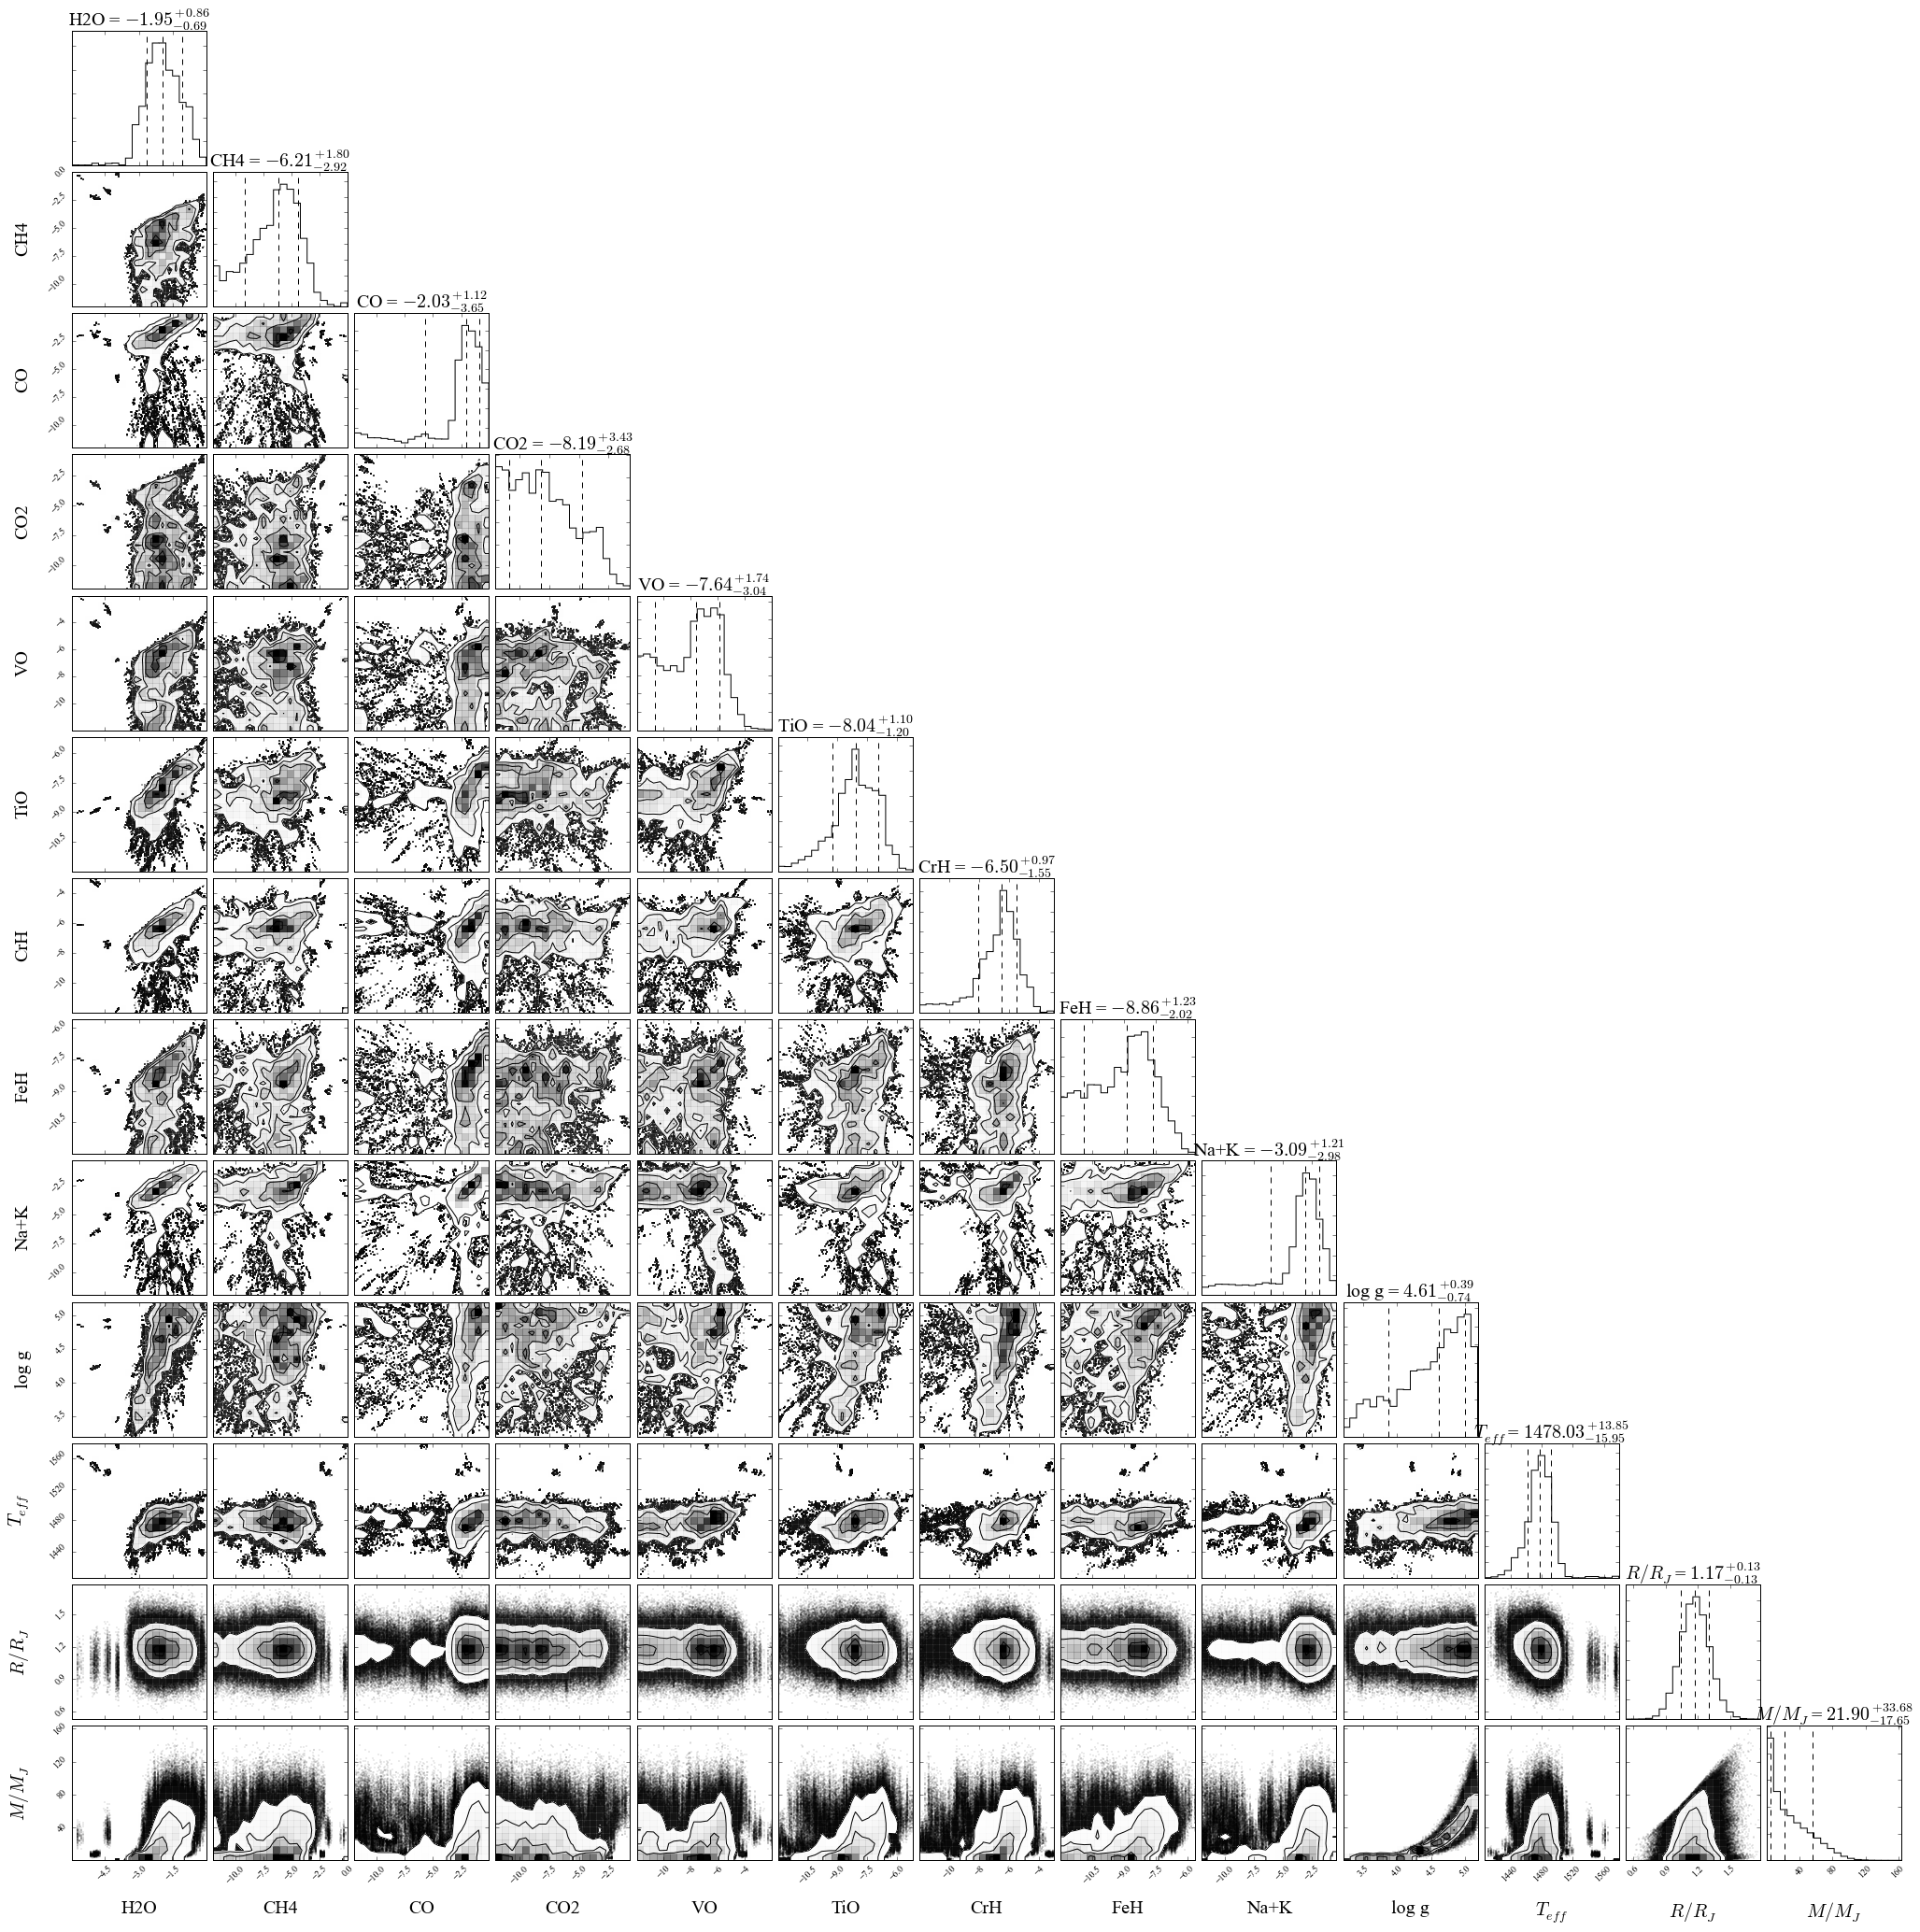

In [11]:
fig = corner.corner(psamp[:,0:13], labels=["H2O", "CH4","CO","CO2","VO","TiO","CrH","FeH","Na+K","log g","$T_{eff}$","$R/R_{J}$","$M/M_{J}$"],quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 20},label_kwargs={"fontsize": 20})
#fig = triangle.corner(samples)
fig.savefig("2M0355_grey_post_corner.png",format='png',dpi=150)

In [15]:
samplus = psamp
#samples2[:, 4] = np.exp(samples[:, 4])
answer = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samplus, [16, 50, 84],
                                                axis=0)))
a2 = map(lambda v: (v[0], v[1], v[2]),
                             zip(*np.percentile(samplus, [16, 50, 84],
                                                axis=0)))

In [16]:
print answer
print a2

[(-1.9529415369033813, 0.85629546642303467, 0.69457138538360441), (-6.2120556831359863, 1.7977018356323242, 2.9233241081237793), (-2.0347359180450439, 1.1186853647232056, 3.6512384700774989), (-8.1944599151611328, 3.4326620101928711, 2.6840362548828125), (-7.6399478912353516, 1.7439823150634766, 3.0424633026123047), (-8.0422549247741699, 1.1002685928344729, 1.1969666481018066), (-6.4950542449951172, 0.96983242034912109, 1.5459986114501945), (-8.8621635437011719, 1.2325954437255859, 2.022517204284668), (-3.0859301090240479, 1.2086530923843384, 2.9826605319976807), (4.6140336990356445, 0.39370059967041016, 0.74059629440307617), (1478.0345458984375, 13.8526611328125, 15.9534912109375), (1.1717921495437622, 0.13350007057189917, 0.13158726215362559), (21.903292655944824, 33.675025367736801, 17.649802474975587)]
[(-2.6475129222869858, -1.9529415369033813, -1.0966460704803467), (-9.1353797912597656, -6.2120556831359863, -4.4143538475036621), (-5.6859743881225429, -2.0347359180450439, -0.91605

In [ ]:
logP = np.arange(-4.0, 2.4, 0.1)  #high res grid
P = 10.**logP
logcoarsePress = np.arange(-4.0, 2.5, 0.53)
print 10.**logcoarsePress
print logcoarsePress.size
print 10.**logP
print logP.size
finePress = P

In [ ]:
Tsamples = sampler.chain[:,niter-1000:,ndim-5:].reshape(-1,5)
nsamps = Tsamples.shape[0]
Tprofs = np.empty([64,Tsamples.shape[0]])
for i in range(0,nsamps):
    Tprofs[:,i] = TPmod.set_prof(2,10.**logcoarsePress,P,Tsamples[i,:])

In [ ]:
Tlays = np.empty([64,3])
for i in range(0,64):
    junk = Tprofs[i,:]
    junk2 = np.percentile(junk, [16, 50, 84],axis=0)
    junk3 = np.array(junk2)
    Tlays[i,:] = junk3[:]
    
#print Tlays
np.array(Tlays[:,1])

In [14]:
# get the cloud stuff
cloudsamples = samples[niter-1000:,ndim-9:ndim-5]

cloudbits = map(lambda v: (v[0],v[1], v[2]),
                             zip(*np.percentile(cloudsamples, [16, 50, 84],axis=0)))
print cloudbits
cloudrough = np.array(cloudbits)
print cloudrough.shape
cloudparams = np.zeros([5,3],dtype='d')
cloudparams[0:4,:] = cloudrough
cloudTopmid = cloudrough[1,1]
cloudToptop = cloudrough[1,0]
cloudTopbot = cloudrough[1,2]
cloudheightmid = cloudrough[2,1]
cloudheightbot = cloudrough[2,0]
cloudheighttop = cloudrough[2,2]

[(0.3131168906036369, 1.3871803324987066, 3.244248838451258), (-2.4056611734978097, -0.88713487081671305, 0.37525643620780613), (0.43534535013097031, 1.5408614694114049, 3.1664304093984423), (0.087998919348646565, 0.39169432942195437, 0.76139664750979663)]
(4, 3)


In [ ]:
plt.rc('font',family='Times New Roman')
fig=plt.figure(dpi=320)
plt.axis([0., 4000.,3.0,-5.0])
#plt.plot(outspec[0,:],(outspec[1,:] / B),'r-')
#plt.plot(outspec[0,:],B,'b-')
#plt.fill_between(T[:,1],T[:,2], logP,facecolor='red',interpolate=True)
#plt.plot(T[:,1],logP,'r--')
#plt.plot(T[:,2],logP,'r--')
sampT = np.empty(5)
sampcloud = np.empty(4)

#plt.plot((Trough[:,0]),logcoarsePress,'k+')
plt.plot(Tlays[:,1],logP,'k-')
plt.fill_betweenx(logP,Tlays[:,0], Tlays[:,2], facecolor='red', alpha=0.3)
plt.fill_between([-100.,5000.0],cloudTopmid,(cloudTopmid+cloudheightmid),facecolor='blue',alpha=(cloudrough[0,1]/10.))
plt.fill_between([-100.,5000.0],cloudToptop,(cloudTopbot+cloudheighttop),facecolor='grey',alpha=(cloudrough[0,0]/10.))
#plt.plot([0,4000],[logP0mid,logP0mid],'g-')
#plt.plot([0,4000],[logP0top,logP0top],'g--')
#plt.plot([0,4000],[logP0bot,logP0bot],'g--')
#plt.plot([0,4000],[np.log10(Trough[2,1]),np.log10(Trough[2,1])], 'y--')
#plt.plot([0,4000],[np.log10(Trough[3,1]),np.log10(Trough[3,1])],'y--')
#plt.plot(Tlays[:,1],logP,'b-')
#plt.fill_betweenx(logP,Tlays[:,0], Tlays[:,2], facecolor='yellow', alpha=0.3)

#btpress,bttemp = np.loadtxt("apriori_prof.dat", unpack = "true")
#btpress = btpress[::-1]
#bttemp = bttemp[::-1]
#BTtfit = sp.interpolate.splrep(np.log10(btpress),bttemp,s=0)
#BTfineprof = sp.interpolate.splev(logP, BTtfit, der=0)
#BTprof =sp.interpolate.splev(logcoarsePress, BTtfit, der=0) 
#plt.plot(BTprof+1000.,logcoarsePress,'g+')
#plt.plot(BTfineprof+1000,logP,'g-')
#simwalk = 20
#startprof = np.zeros([simwalk,13])
#for i in range(0,simwalk):
#    startprof[i,:] = (BTprof + 1000.) + (200. * np.random.randn())
        
#for j in range(0,simwalk):
#        sttfit = sp.interpolate.splrep(logcoarsePress,startprof[j,:],s=0)
#        finestprof = sp.interpolate.splev(logP, sttfit, der=0) 
#        plt.plot(finestprof,logP,'y-')
plt.ylabel(r'log(P / bar)')
plt.xlabel('T/K')

#asp = 10 / 3.5

#plt.axes().set_aspect(asp)
plt.savefig('2M0355_grey_prof_1sigma.png',format='png', dpi=720)


In [ ]:
w1 = 0.8
w2 = 2.4

dist = 8.19
# hardwired FWHM of data in microns
fwhm = 0.005

npatches = 1
nclouds = 1
pcover = np.ones([npatches],dtype='f')
pcover[:] = 1.0
do_clouds = np.zeros([npatches],dtype='i')
do_clouds[:] = 1
cloudnum = np.zeros([npatches,nclouds],dtype='i')
cloudnum[:,:] = 99
cloudtype = np.array([npatches],dtype='i')
cloudtype[:] = 1

use_disort = 0 

# Set the profile type
proftype = 2

# now the linelist
# Set up number of gases, and point at the lists. see gaslist.dat
ngas = 10
gasnum = np.asfortranarray(np.array([1,2,4,5,7,8,10,11,20,21],dtype='i'))
lists = ["../Linelists/H2O_xsecs.pic","../Linelists/ch4_xsecs.pic","../Linelists/co_xsecs.pic","../Linelists/co2_xsecs.pic","../Linelists/tio_xsecs.pic","../Linelists/vo_xsecs.pic","../Linelists/crh_xsecs.pic" ,"../Linelists/feh_xsecs.pic","../Linelists/K_Mike_xsecs.pic","../Linelists/Na_Mike_xsecs.pic"]

In [ ]:
# get the basic framework from water list
rawwavenum, inpress, inlinetemps, inlinelist = pickle.load( open('../Linelists/H2O_xsecs.pic', "rb" ) )
wn1 = 10000./w2
wn2 = 10000. / w1
inwavenum = np.asfortranarray(rawwavenum[np.where(np.logical_not(np.logical_or(rawwavenum[:] > wn2, rawwavenum[:] < wn1)))],dtype='float64')
ntemps = inlinetemps.size
npress= finePress.size
nwave = inwavenum.size
r1 = np.amin(np.where(np.logical_not(np.logical_or(rawwavenum[:] > wn2, rawwavenum[:] < wn1))))
r2 = np.amax(np.where(np.logical_not(np.logical_or(rawwavenum[:] > wn2, rawwavenum[:] < wn1))))

# Here we are interpolating the linelist onto our fine pressure scale.
# pickles have linelist as 4th entry....
linelist = (np.ones([ngas,npress,ntemps,nwave],order='F')).astype('float64', order='F')
for gas in range (0,ngas):
    inlinelist= pickle.load( open(lists[gas], "rb" ) )[3]
    # make missing bits crazy. They are all high pressure, low-temp points.
    #inlinelist[np.isnan(inlinelist)] = 1.0
    for i in range (0,ntemps):
        for j in range (r1,r2+1):
            pfit = interp1d(np.log10(inpress),np.log10(inlinelist[:,i,j]))
            linelist[gas,:,i,(j-r1)] = np.asfortranarray(pfit(np.log10(finePress)))

linelist[np.isnan(linelist)] = -50.0


In [ ]:
alkratio = 16.2 # Asplund+ 2009
logVMR = np.asfortranarray(np.ones([10,64,3]),dtype='float64')
testVMR =np.asfortranarray(np.ones([64,3]),dtype='float64')
for i in range(0,3):
    logVMR[0,:,i] = np.full((npress,),(vmr[0,i])) # water
    logVMR[1,:,i] = np.full((npress,),(vmr[1,i])) # CH4
    logVMR[2,:,i] = np.full((npress,),(vmr[2,i])) # CO
    logVMR[3,:,i] = np.full((npress,),(vmr[3,i])) # CO2
    logVMR[4,:,i] = np.full((npress,),(vmr[4,i])) # TiO
    logVMR[5,:,i] = np.full((npress,),(vmr[5,i])) # VO
    logVMR[6,:,i] = np.full((npress,),(vmr[6,i])) # CrH
    logVMR[7,:,i] = np.full((npress,),(vmr[7,i])) # FeH
    logVMR[8,:,i]  = np.full((npress,),(np.log10(10.**vmr[8,i] / (alkratio+1.))))
    logVMR[9,:,i]  = np.full((npress,),(np.log10(10.**vmr[8,i] * (alkratio / (alkratio+1.)))))

#print VMR1.shape


In [ ]:
tmpcia, ciatemps = ciamod.read_cia("CIA_DS_aug_2015.dat",inwavenum)
cia = np.asfortranarray(np.empty((4,ciatemps.size,nwave)),dtype='float32')
cia[:,:,:] = tmpcia[:,:,:nwave] 
ciatemps = np.asfortranarray(ciatemps, dtype='float32')

In [ ]:
print forwardmodel.marv.__doc__

In [ ]:
outspec = np.zeros((2,nwave,3),dtype='d')
press = P
i = 1
for j in range(0,3):
    cloudprof,cloudrad,cloudsig = cloud.atlas(do_clouds,cloudnum,cloudtype,cloudparams[:,i],press)
    cloudnum = np.asfortranarray(cloudnum,dtype='i')
    cloudrad = np.asfortranarray(cloudrad,dtype='float64')
    cloudsig = np.asfortranarray(cloudsig,dtype='float64')
    cloudprof = np.asfortranarray(cloudprof,dtype='float64')
    pcover = np.asfortranarray(pcover,dtype='float32')
    do_clouds = np.asfortranarray(do_clouds,dtype='i')

    bitsamples = samples[:,ngas-1:ngas+2]
    bitslist = map(lambda v: (v[0], v[1], v[2]),
                             zip(*np.percentile(bitsamples, [16, 50, 84],
                                                axis=0)))
    bits = np.array(bitslist)
    logg = np.array(bits[0,i])
    R2D2 = np.array(bits[1,i])
    dlam = np.array(bits[2,i])
    temp = Tlays[:,i]
    tmpoutspec = forwardmodel.marv(temp,logg,R2D2,gasnum,logVMR[:,:,i],pcover,do_clouds,cloudnum,cloudrad,cloudsig,cloudprof,inlinetemps,press,inwavenum,linelist,cia,ciatemps,use_disort)
    outspec[:,:,j] = tmpoutspec[:,:nwave]
print bitslist
print outspec

In [ ]:
print outspec.shape

In [ ]:
obspec = np.loadtxt("2M0355_2massJcalib.dat",unpack=True)
pltspec = np.ones([obspec.shape[1],3])
wavenew = obspec[0,:]

In [ ]:
trimspec = outspec[:,:nwave,:]
shiftspec = np.empty_like(trimspec)
shiftspec[0,:,:] =  trimspec[0,:,:] + dlam
shiftspec[1,:,:] =  trimspec[1,:,:]   
wno = 1e4 / shiftspec[0,:,0]
for i in range(0,3):
    pltspec[:,i] = instrument_non_uniform(obspec[0,:],wno,shiftspec[1,:,i])

In [ ]:
plt.rc('font',family='Times New Roman')
fig=plt.figure(dpi=320)
plt.axis([0.7,2.5, 0.,15e-15])
#plt.plot(outspec[0,:],outspec[1,:],'r-')
plt.plot(obspec[0,::3],obspec[1,::3],'k-')
plt.plot(wavenew[::3],pltspec[::3,1],'r-')
plt.fill_between(wavenew[::3], pltspec[::3,0], pltspec[::3,2], facecolor='red', alpha=0.3)

plt.ylabel(r'$Flux$')
plt.xlabel('Wavelength / Microns')
plt.savefig('2M0355_specFIT.pdf',format='pdf', dpi=720)


In [ ]:
#np.savetxt('2m2224_FIT_spectrum.dat', np.c_[wavenew[:],pltspec[:,1]

In [ ]:
chisq = sum(((pltspec[::3,1]) - obspec[1,::3])**2 / obspec[2,::3]**2) / (obspec.shape[1]/3)
print pltspec.shape[0]
print obspec.shape[1]

In [ ]:
print chisq
print (np.sqrt(2) * np.max(obspec[2,:]**2))
#print np.max(obspec[2,:]**2 + 10.**bits[3,1]) / np.max(obspec[2,:]**2)

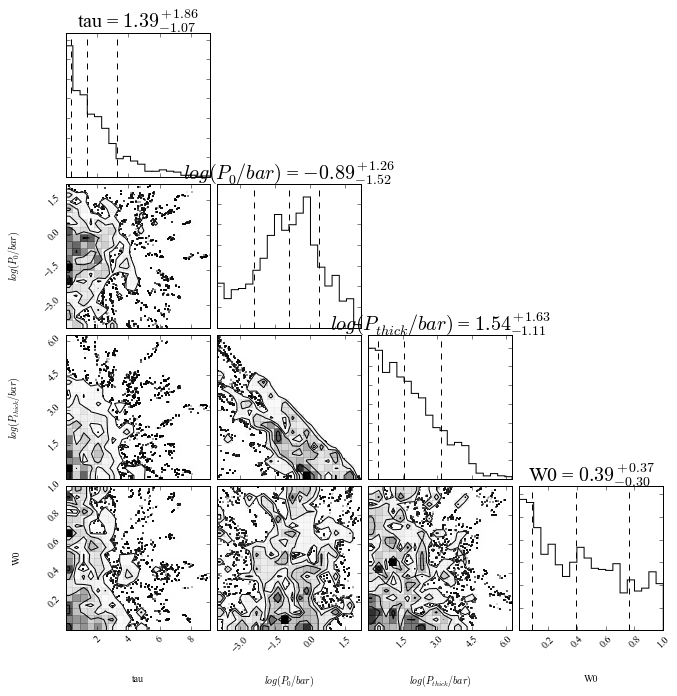

In [15]:
fig = corner.corner(cloudsamples,labels=["tau", "$log(P_{0} / bar)$", "$log (P_{thick} / bar)$","W0"],quantiles=[0.16, 0.5, 0.84],show_titles=True, title_kwargs={"fontsize": 20},label_kwargs={"fontsize": 10})
fig.savefig("2m0355_ch4_grey_cloud_corner.png")

In [ ]:
fig = corner.corner(bitsamples,labels=["logg", "R2D2","dlam"])


In [ ]:
r2d2 = bits[1,1]
r = np.sqrt(r2d2  * (3.086e+16 * dist)**2)
print r / 70000e3 
logg = bits[0,1]
g = (10.**logg)/100.
M = (r**2 * g/(6.67E-11))/1.898E27
print M

In [ ]:
print np.finfo(np.float32).